### Carga de librerías necesarias para ETL

In [20]:
import glob
import pandas as pd
import numpy as np
import math
import missingno as msno
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

### Extracción

In [3]:
# TODO: 
# Probablemente se debería arrancar descomprimiendo el archivo: Clou_diario_diplo.rar

### Carga de datasets
Consumos:

In [21]:
# Son archivos mensuales CSV con ; como separador
archivos_cargados=[]

# Construccion del dataframe
consumos= pd.DataFrame()

# Carga de las lectoras mensuales de consumos
for each_file in glob.glob('*FINAL.csv'):
    archivos_cargados.append(each_file)
    datos_mes = pd.read_csv(each_file, sep=";", decimal=',')
    consumos = pd.concat([consumos, datos_mes])

Contratos:

In [22]:
# Es un archivo CSV con ; como separador
qgis = pd.read_csv('QGIS_final.csv', sep=";", decimal=',')

Clima:

In [23]:
# Es un archivo de texto de ancho fijo
col_widths = [8, 6, 6, 40]

# Columnas
column_names = ['FECHA', 'TMAX', 'TMIN', 'NOMBRE']

# Archivo
file_path = 'clima.txt'

# Carga
clima = pd.read_fwf(file_path, widths=col_widths, names=column_names, header=None)

# Me quedo solo con mediciones de Cordoba
clima = clima.loc[clima['NOMBRE'].str.contains('CORDOBA')]

Observatorio:

In [24]:
# Es un archivo de texto con múltiples datos las precipitaciones contienen además comentarios
precipitaciones = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=5, nrows=31)

# Se elimina columna sin datos creada automáticamente
precipitaciones.drop('Unnamed: 13', axis=1, inplace=True)

In [25]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_max = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=44, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_max.drop('Unnamed: 13', axis=1, inplace=True)

In [26]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_min = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=82, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_min.drop('Unnamed: 13', axis=1, inplace=True)

In [27]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_avg = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=120, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_avg.drop('Unnamed: 13', axis=1, inplace=True)

### Observación inicial de los datos disponibles

In [28]:
consumos.head()

,DEVICE,TV,UPDATE_TV,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,...,subestacion,zona,distrito,distrito_descripcion,grupo_lectura,ruta_lectura,orden_lectura,grupo_tarifario,codigo_tarifa,tarifa
0,0,01/04/2023,01/04/2023,NaN,2056.889,2056.889,1056.180,509.874,490.835,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,02/04/2023,02/04/2023,NaN,2060.817,2060.817,1058.104,510.974,491.739,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,03/04/2023,03/04/2023,NaN,2064.734,2064.734,1060.293,511.825,492.616,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,04/04/2023,04/04/2023,NaN,2069.143,2069.143,1062.696,512.975,493.472,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,05/04/2023,05/04/2023,NaN,2073.270,2073.270,1064.989,513.891,494.390,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
qgis.head()

,DEVICE,suministro,cliente,contrato,fecha_inicio,sea,distribuidor,subestacion,zona,distrito,distrito_descripcion,grupo_lectura,ruta_lectura,orden_lectura,grupo_tarifario,codigo_tarifa,tarifa
0,0,01_AA01,LZKVIR,3,2010-06-08Z,DBOSCO,13_ACHATEAU,5282.0,A,1,CORDOBA,1,1223,168,1,190,Residencial
1,1,01_AA02,EVLNRMZ,5,2014-05-06Z,DBOSCO,13_ACHATEAU,5311.0,A,1,CORDOBA,1,1223,90,1,140,1.a/f RESIDENCIAL
2,2,01_AA03,RXXDNSQ,4,2023-10-25Z,DBOSCO,13_ACHATEAU,5076.0,A,1,CORDOBA,1,1223,414,1,140,1.a/f RESIDENCIAL
3,3,01_AA04,ZTHSMEW,2,2022-08-17Z,NaN,13_ACHATEAU,5311.0,A,1,CORDOBA,1,1223,6,1,140,1.a/f RESIDENCIAL
4,4,01_AA05,IELVEK,1,1990-06-30Z,DFUNES,13_CARAFA,1685.0,A,1,CORDOBA,3,1261,37,1,140,1.a/f RESIDENCIAL


In [13]:
clima.head()

,FECHA,TMAX,TMIN,NOMBRE
26,10062024,20.5,5.3,CORDOBA AERO
27,10062024,21.5,7.6,CORDOBA OBSERVATORIO
145,09062024,26.4,11.0,CORDOBA AERO
146,09062024,25.5,14.2,CORDOBA OBSERVATORIO
264,08062024,24.8,13.0,CORDOBA AERO


In [14]:
temperatura_avg.head()

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,22.6,"25,6",26.7,"18,9",16.6,"16,7",13.3,23.4,"19,5",20.6,"10,1",26.0
1,2,24.5,"22,2",27.9,"18,8",16.4,"20,5",20.8,20.5,"14,1",22.4,"11,3",26.4
2,3,24.5,"23,8",27.6,"20,8",15.4,"18,5",19.2,16.3,"10,5",17.5,"15,0",16.2
3,4,26.1,"23,5",28.2,"20,8",15.2,"15,7",22.1,14.6,"12,8",16.1,"20,0",15.8
4,5,27.5,"25,8",29.3,"20,8",14.7,"16,3",17.0,16.9,"12,0",19.0,"22,2",16.5


In [29]:
print('consumos: ', consumos.shape, ' contratos:', qgis.shape, ' clima:', clima.shape, ' precipitaciones:', precipitaciones.shape, ' temperatura:',temperatura_min.shape, temperatura_avg.shape, temperatura_max.shape)

consumos:  (1722684, 46)  contratos: (4751, 17)  clima: (730, 4)  precipitaciones: (31, 13)  temperatura: (31, 13) (31, 13) (31, 13)


### Limpieza y preparación de los datasets

#### Consumos

In [30]:
# Renombro columnas (de acuerdo las instrucciones recibidas)
consumos = consumos.rename(columns={'VALUE2': 'Energia_Siempre_Positiva', 'VALUE3': 'Energia_Directa', 'VALUE4': 'Energia_Directa_Resto',
                                    'VALUE5': 'Energia_Directa_Pico', 'VALUE6': 'Energia_Directa_Valle', 'VALUE7': 'Energia_Inversa', 
                                    'VALUE8': 'Energia_Inversa_Resto', 'VALUE9': 'Energia_Inversa_Pico', 
                                    'VALUE10': 'Energia_Inversa_Valle', 'VALUE19': 'Maxima_Demanda', 'VALUE20': 'Fecha_hora'})

Verificación inicial de datos faltantes:

In [11]:
(round(consumos.isna().sum() * 100 / consumos.shape[0], 2)).astype(str) + "%"

DEVICE                        0.0%
TV                           0.28%
UPDATE_TV                    0.28%
VALUE1                      100.0%
Energia_Siempre_Positiva     0.28%
Energia_Directa              0.28%
Energia_Directa_Resto        0.28%
Energia_Directa_Pico         0.28%
Energia_Directa_Valle        0.28%
Energia_Inversa              0.28%
Energia_Inversa_Resto        0.28%
Energia_Inversa_Pico         0.28%
Energia_Inversa_Valle        0.28%
VALUE11                      0.28%
VALUE12                      0.28%
VALUE13                      0.28%
VALUE14                      0.28%
VALUE15                      0.28%
VALUE16                      0.28%
VALUE17                      0.28%
VALUE18                      0.28%
Maxima_Demanda               0.28%
Fecha_hora                   0.28%
VALUE21                     99.97%
VALUE22                     99.97%
VALUE23                     99.97%
VALUE24                     99.97%
VALUE25                     99.97%
VALUE26             

In [31]:
# Umbral para eliminar columnas sin datos 
umbral = 90 # (90% en este caso)

for column in consumos.columns:
    # Calculando el porcentaje de valores no nulos en la columna
    porcentaje = consumos[column].count() / len(consumos) * 100
    
    # Si es menor al umbral
    if porcentaje < umbral:
        # eliminamos columna
        consumos.drop(column, axis=1, inplace=True)

In [33]:
consumos.isna().sum() * 100 / consumos.shape[0]

DEVICE                      0.000000
TV                          0.275791
UPDATE_TV                   0.275791
Energia_Siempre_Positiva    0.275791
Energia_Directa             0.275791
Energia_Directa_Resto       0.275791
Energia_Directa_Pico        0.275791
Energia_Directa_Valle       0.275791
Energia_Inversa             0.275791
Energia_Inversa_Resto       0.275791
Energia_Inversa_Pico        0.275791
Energia_Inversa_Valle       0.275791
VALUE11                     0.275791
VALUE12                     0.275791
VALUE13                     0.275791
VALUE14                     0.275791
VALUE15                     0.275791
VALUE16                     0.275791
VALUE17                     0.275791
VALUE18                     0.275791
Maxima_Demanda              0.275791
Fecha_hora                  0.275791
RN                          0.275791
dtype: float64

In [53]:
consumos['UPDATE_TV'] = pd.to_datetime(consumos['UPDATE_TV'], format='%d/%m/%Y') 

In [54]:
consumos['TV'] = pd.to_datetime(consumos['TV'], format='%d/%m/%Y') 

existen valores erroneos en 'Fecha_hora':

In [55]:
consumos.loc[consumos['Fecha_hora']=='FFFF-FF-FF  FF:FF:FF'].head()

,DEVICE,TV,UPDATE_TV,Energia_Siempre_Positiva,Energia_Directa,Energia_Directa_Resto,Energia_Directa_Pico,Energia_Directa_Valle,Energia_Inversa,Energia_Inversa_Resto,...,VALUE12,VALUE13,VALUE14,VALUE15,VALUE16,VALUE17,VALUE18,Maxima_Demanda,Fecha_hora,RN
301,10,2023-04-02,2023-04-02,3.459,3.459,2.082,0.790,0.587,0.0,0.0,...,2.931,0.860,1.006,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,300661.0
302,10,2023-04-03,2023-04-03,3.459,3.459,2.082,0.790,0.587,0.0,0.0,...,2.931,0.860,1.006,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,106930.0
303,10,2023-04-04,2023-04-04,3.459,3.459,2.082,0.790,0.587,0.0,0.0,...,2.931,0.860,1.006,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,168175.0
421,14,2023-04-02,2023-04-02,8164.204,8164.204,7717.137,317.335,129.732,0.0,0.0,...,154.546,2.851,2.481,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,238901.0
422,14,2023-04-03,2023-04-03,8164.204,8164.204,7717.137,317.335,129.732,0.0,0.0,...,154.546,2.851,2.481,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,10881.0


corrección de valores erroneos con ffill

In [56]:
consumos['Fecha_hora'] = pd.to_datetime(consumos['Fecha_hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce').ffill()

#### Contratos

In [57]:
(round(qgis.isna().sum() * 100 / qgis.shape[0], 2)).astype(str) + "%"

DEVICE                   0.0%
suministro               0.0%
cliente                  0.0%
contrato                 0.0%
fecha_inicio             0.0%
sea                     0.76%
distribuidor             0.0%
subestacion             0.02%
zona                     0.0%
distrito                 0.0%
distrito_descripcion     0.0%
grupo_lectura           0.02%
ruta_lectura             0.0%
orden_lectura            0.0%
grupo_tarifario          0.0%
codigo_tarifa            0.0%
tarifa                   0.0%
dtype: object

In [58]:
# TODO:
# Hacer una imputación con SimpleImputer usando la moda para cada tupla distribuidor y ruta_lectura
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1348) & (qgis['subestacion'].isna()), 'subestacion'] = 5209.0
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1287) & (qgis['subestacion'].isna()), 'subestacion'] = 3122.0
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1201) & (qgis['subestacion'].isna()), 'subestacion'] = 3193.0
qgis.loc[(qgis['distribuidor']=='13_OPERA') & (qgis['subestacion'].isna()), 'subestacion'] = 3982.0
qgis.loc[(qgis['distribuidor']=='13_D10_LIBERTAD') & (qgis['subestacion'].isna()), 'subestacion'] = 3638.0

Validación de los campos fecha:

In [59]:
qgis['fecha_inicio'] = pd.to_datetime(qgis['fecha_inicio'].replace('Z','', regex=True), format='%Y-%m-%d') 

#### Clima

In [60]:
clima['FECHA'] = pd.to_datetime(clima['FECHA'], format='%d%m%Y') 

#### Precipitaciones

Asignación de valores en las precipitaciones:

In [61]:
# S/P equivale a "no llovió", <0.1 equivale a 0.1
precipitaciones = precipitaciones.replace('S/P',0).replace('<0.1',0.1).replace(',','.', regex=True)

In [62]:
precipitaciones.apply(pd.to_numeric)

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,3.0,22.5,0.1,0.1,0.0,0.0,0.0,0,0.0,0.0,10.0,0.6
1,2,0.0,0.0,0.0,2.0,0.1,0.0,0.0,0,3.0,0.0,0.0,1.0
2,3,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0,0.2,0.0,0.0,3.0
3,4,0.0,0.0,0.0,0.1,9.0,0.1,0.0,0,0.0,0.0,0.0,4.0
4,5,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0,0.0,0.0,0.0,4.0
5,6,0.0,0.0,22.0,0.0,0.0,0.0,0.1,0,2.0,0.0,0.0,0.2
6,7,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0,0.0,0.0,0.0
9,10,9.5,0.0,0.0,0.0,0.0,0.0,9.5,0,0.0,0.0,0.0,0.0


#### Temperaturas

In [63]:
temperatura_min = temperatura_min.replace('s/d',np.NaN).replace(',','.', regex=True)
temperatura_avg = temperatura_avg.replace('s/d',np.NaN).replace(',','.', regex=True)
temperatura_max = temperatura_max.replace('s/d',np.NaN).replace(',','.', regex=True)

In [64]:
temperatura_min.apply(pd.to_numeric)
temperatura_avg.apply(pd.to_numeric)
temperatura_max.apply(pd.to_numeric)

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,30.1,30.2,33.0,24.7,20.0,24.8,23.1,34.5,28.6,29.0,12.5,35.0
1,2,32.1,28.2,37.8,20.6,20.5,27.4,27.6,30.0,23.6,30.1,14.4,33.0
2,3,31.5,29.0,35.2,26.6,19.2,24.3,25.5,21.5,13.6,24.4,24.5,27.6
3,4,33.5,29.0,37.5,24.7,18.4,19.2,30.1,23.3,17.4,23.4,27.5,18.3
4,5,35.5,32.6,37.2,25.4,16.5,21.6,20.5,23.0,17.4,27.7,30.5,19.5
5,6,36.7,35.3,35.5,28.3,21.7,26.2,16.0,26.0,16.2,29.6,33.8,28.4
6,7,38.2,36.7,32.1,29.4,26.4,21.5,14.5,18.7,20.4,28.2,43.7,32.5
7,8,37.8,32.7,36.2,29.8,24.8,29.6,20.8,17.0,18.8,31.2,30.3,30.0
8,9,38.2,34.5,36.2,30.4,27.5,23.2,16.8,19.7,24.2,32.6,29.6,27.4
9,10,39.5,35.2,37.4,30.6,23.4,14.9,15.8,26.0,35.0,38.5,29.5,32.8


#### Manejo de fechas

In [65]:
print('Rango de fechas de los consumos:',consumos['Fecha_hora'].min(),'-',consumos['Fecha_hora'].max())
print('Rango de fechas de los contratos:',qgis['fecha_inicio'].min(),'-',qgis['fecha_inicio'].max())
print('Rango de fechas del clima:',clima['FECHA'].min(),'-',clima['FECHA'].max())


Rango de fechas de los consumos: 2023-01-01 00:15:00 - 2023-12-31 00:00:00
Rango de fechas de los contratos: 1990-06-30 00:00:00 - 2024-06-04 00:00:00
Rango de fechas del clima: 2023-06-12 00:00:00 - 2024-06-10 00:00:00


Unificamos los 4 dataset con datos de Observatorio en una único dataset en formato tabular:

In [66]:
# Creamos una función para pasar del formato calendario al tabular
def process_data(data, var_name):
    melted_data = data.melt('Día', var_name='Fecha', value_name=var_name)
    melted_data['Fecha'] = pd.to_datetime('2023' + melted_data['Fecha'].replace('Ene','Jan').replace('Abr','Apr').replace('Ago','Aug').replace('Dic','Dec')
                                          + melted_data.pop('Día').astype(str), format='%Y%b%d', errors='coerce')
    melted_data = melted_data.dropna(subset=['Fecha'])
    melted_data[var_name]= melted_data[var_name].apply(pd.to_numeric)
    return melted_data

# Procesamos cada dataset del Observatorio y los combinamos
observatorio = process_data(temperatura_max, 'Temperatura_max')
observatorio = observatorio.merge(process_data(temperatura_min, 'Temperatura_min'), how='left', on='Fecha')
observatorio = observatorio.merge(process_data(temperatura_avg, 'Temperatura_avg'), how='left', on='Fecha')
observatorio = observatorio.merge(process_data(precipitaciones, 'Precipitaciones'), how='left', on='Fecha')

Eliminamos datos del dataset Clima que están fuera del rango útil:

In [67]:
clima = clima.loc[(clima['FECHA']>='2023-01-01') & (clima['FECHA']<='2023-12-31')].sort_values('FECHA')

Agregamos al dataset de consumos datos del clima provenientes de Observatorio

In [68]:
consumos = consumos.merge(observatorio, how='left', left_on='TV', right_on='Fecha')

In [69]:
consumos.drop('Fecha', axis=1, inplace=True)

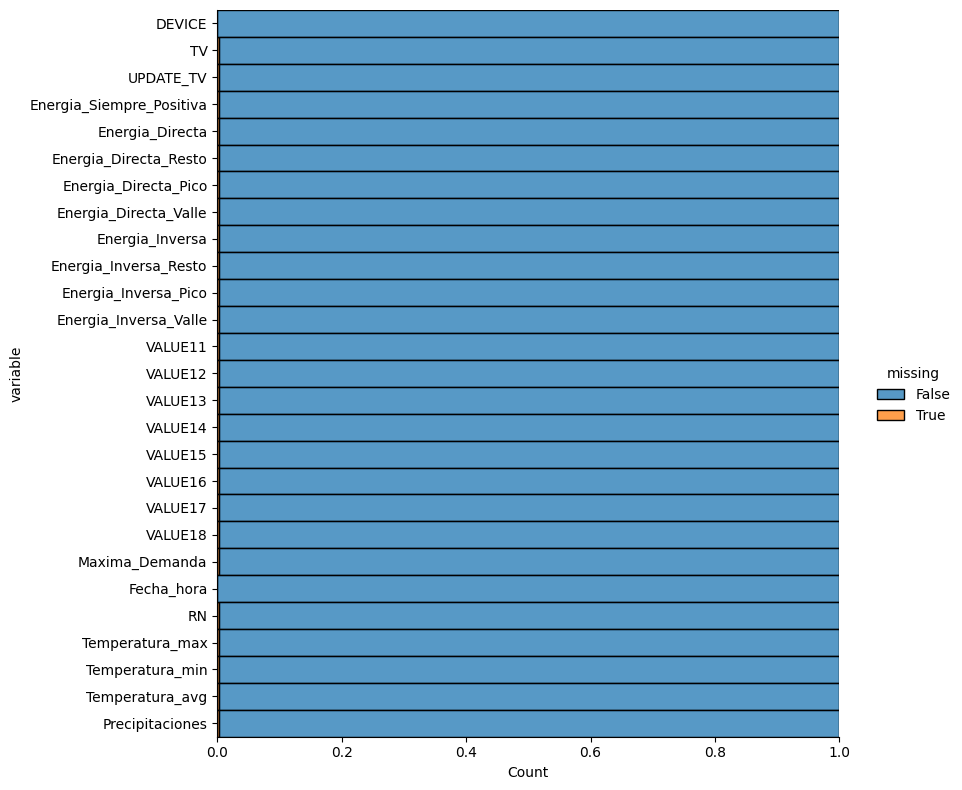

In [70]:
sns.displot(
    data=consumos.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

Clusters of missing data

<Axes: >

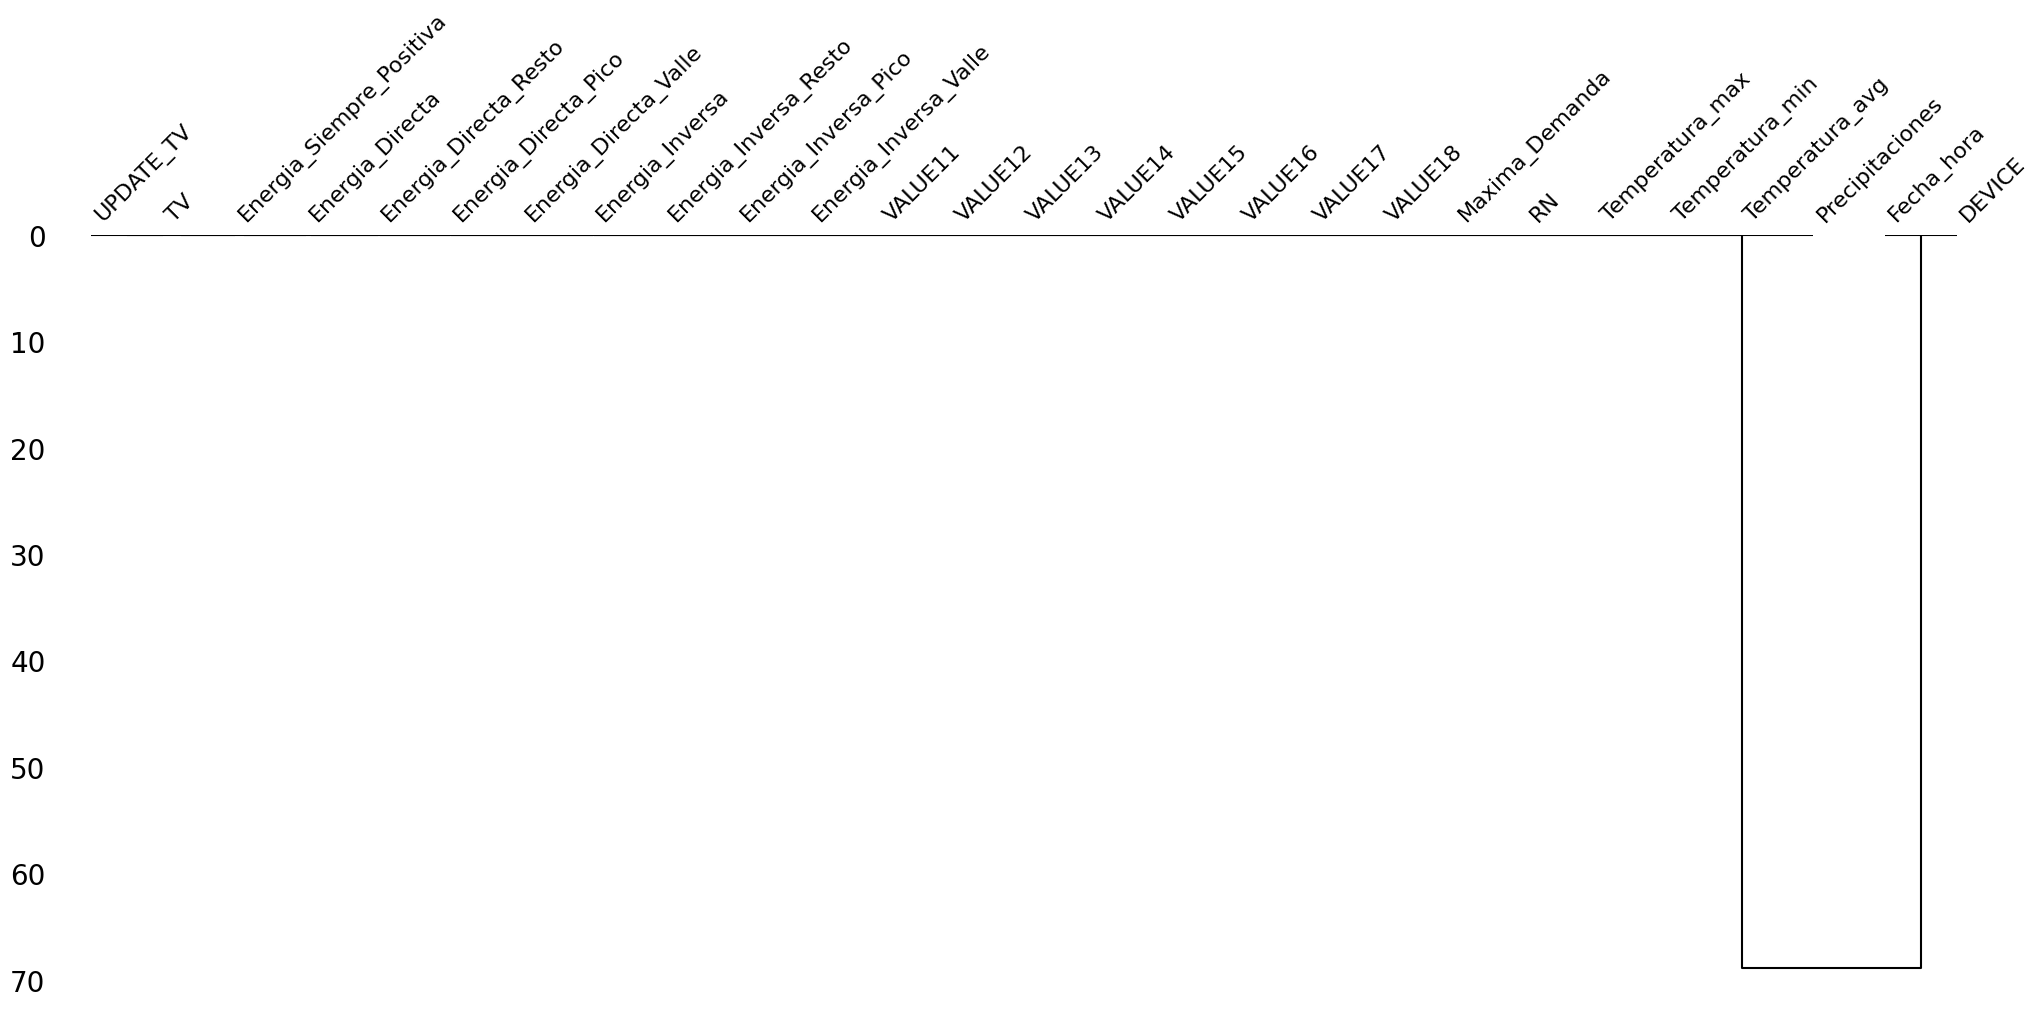

In [72]:
msno.dendrogram(consumos)

<Axes: >

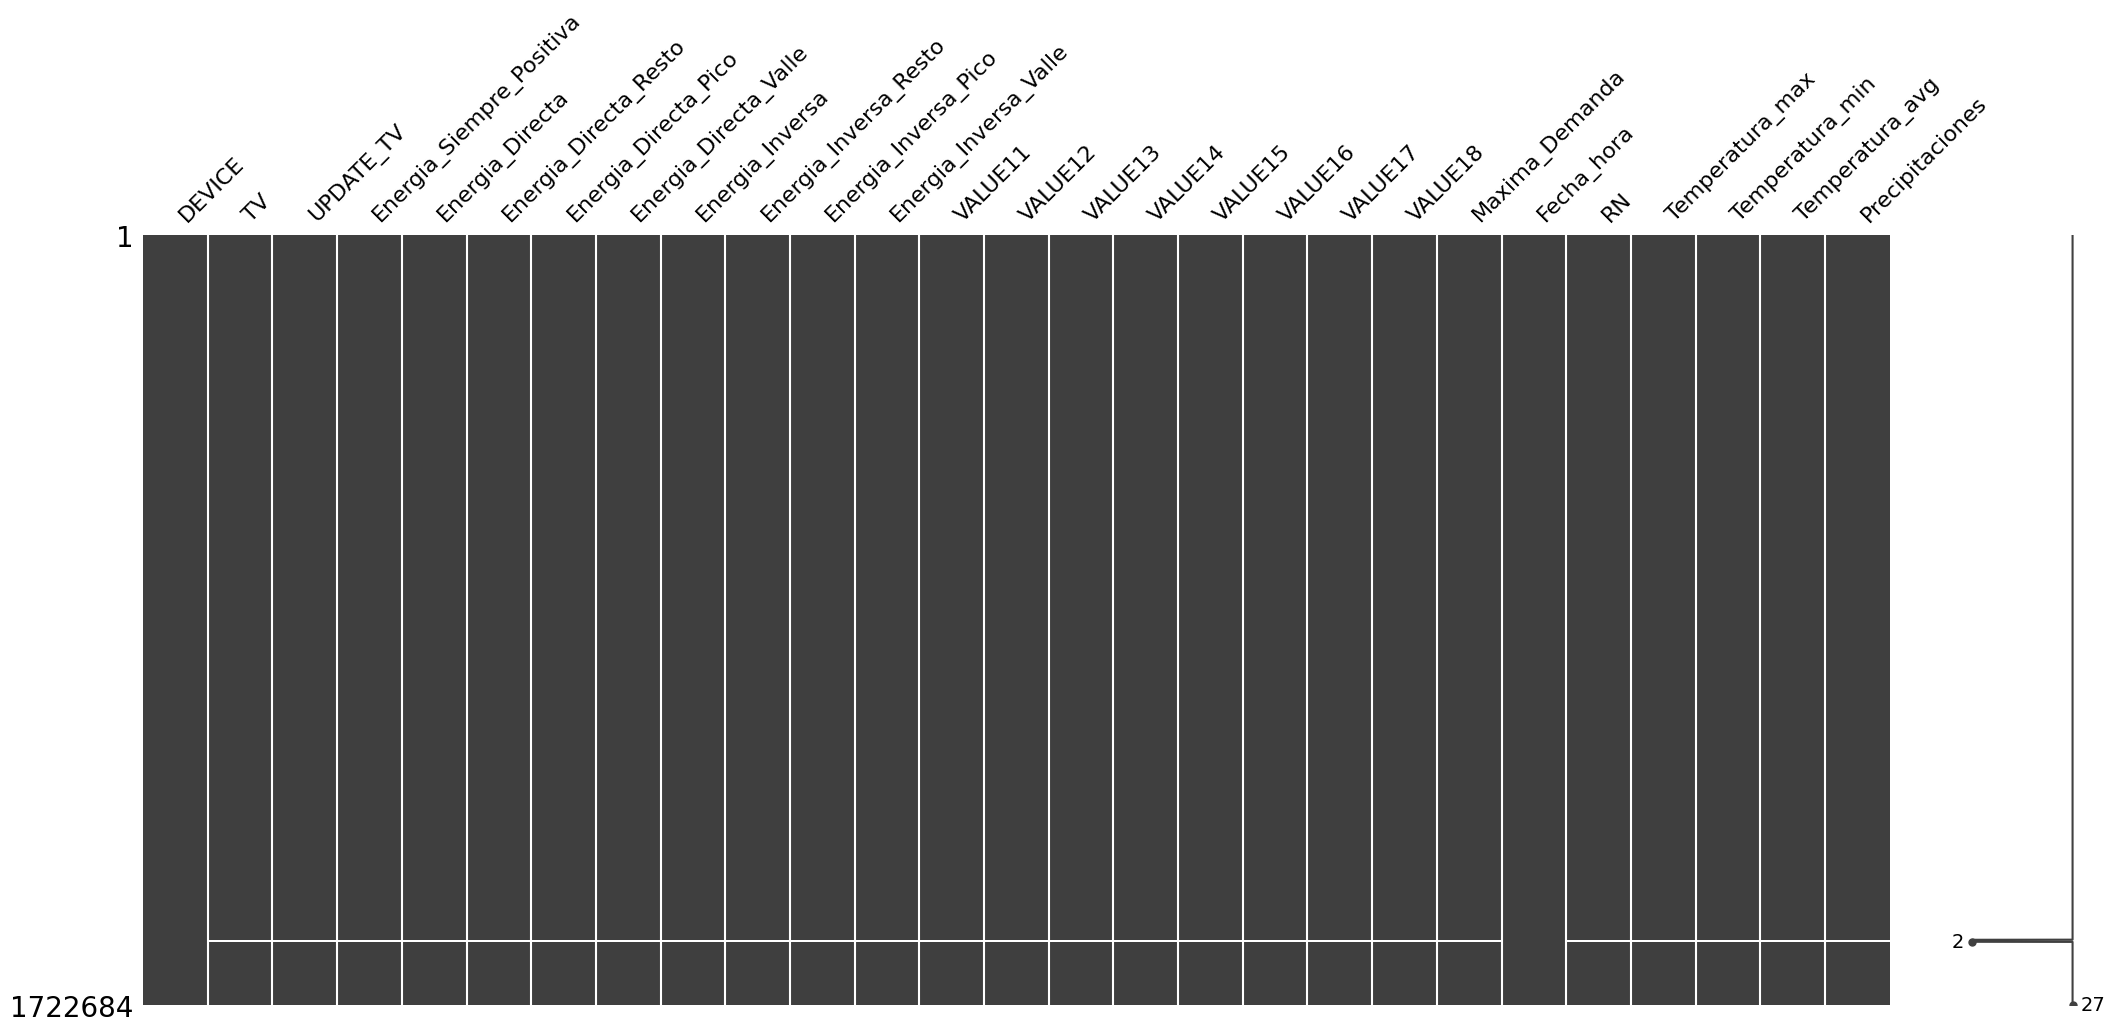

In [74]:
msno.matrix(consumos, filter='top', p=0.7)